# Optical Elements as Ophyd Objects

This section is based on the **TES** beamline example.

**Hint**: See the [List of predefined simulations in Sirepo](../simulations.rst) for examples of identifiers for different beamlines.

## Run "Beamline" SRW simulations

In this example, we scan the horizontal size of the aperture and collect the resulting averaged intensities and corresponding 2D intensity distributions from the "Watchpoint" report on the "Beamline" page of Sirepo/SRW app.

Start ``ipython`` and run the following where ``sim_id`` is the UID for the simulation we are working with:



Transient Scan ID: 1     Time: 2021-12-16 18:45:55
Persistent Unique Scan ID: '42fbc91f-11ce-45ab-aec1-19c04cce692c'


New stream: 'primary'
+-----------+------------+-------------------------+------------+
|   seq_num |       time | aperture_horizontalSize |    w9_mean |
+-----------+------------+-------------------------+------------+
|         1 | 18:46:26.3 |                   0.000 |      0.000 |


|         2 | 18:46:51.8 |                   0.500 | 2510544190625.287 |


|         3 | 18:47:17.3 |                   1.000 | 41560782559219.422 |


|         4 | 18:47:42.8 |                   1.500 | 136793792948293.203 |


|         5 | 18:48:08.4 |                   2.000 | 346875726031568.125 |
+-----------+------------+-------------------------+------------+
generator scan ['42fbc91f'] (scan num: 1)





                                 time  aperture_horizontalSize  \
seq_num                                                          
1       2021-12-16 18:46:26.367208719                      0.0   
2       2021-12-16 18:46:51.856653452                      0.5   
3       2021-12-16 18:47:17.337036371                      1.0   
4       2021-12-16 18:47:42.889437914                      1.5   
5       2021-12-16 18:48:08.433980942                      2.0   

                                       w9_sirepo_data_json  \
seq_num                                                      
1        {"models": {"arbitraryMagField": {"interpolati...   
2        {"models": {"arbitraryMagField": {"interpolati...   
3        {"models": {"arbitraryMagField": {"interpolati...   
4        {"models": {"arbitraryMagField": {"interpolati...   
5        {"models": {"arbitraryMagField": {"interpolati...   

                                       w9_sirepo_data_hash  w9_duration  \
seq_num                    

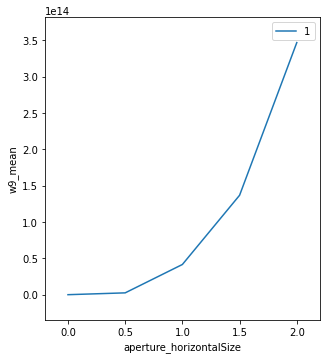

In [1]:
%run -i ../../../examples/prepare_det_env.py

from sirepo_bluesky.sirepo_bluesky import SirepoBluesky
from sirepo_bluesky.sirepo_ophyd import create_classes

connection = SirepoBluesky("http://localhost:8000")

data, schema = connection.auth("srw", "00000002")
classes, objects = create_classes(connection.data,
                                  connection=connection)
globals().update(**objects)

aperture.horizontalSize.kind = "hinted"

(uid,) = RE(bp.scan([w9], aperture.horizontalSize, 0, 2, 5))

hdr = db[uid]
tbl = hdr.table(fill=True)
print(tbl)

w9_image = np.array(list(hdr.data("w9_image")))

Data shape: (5, 42, 960)


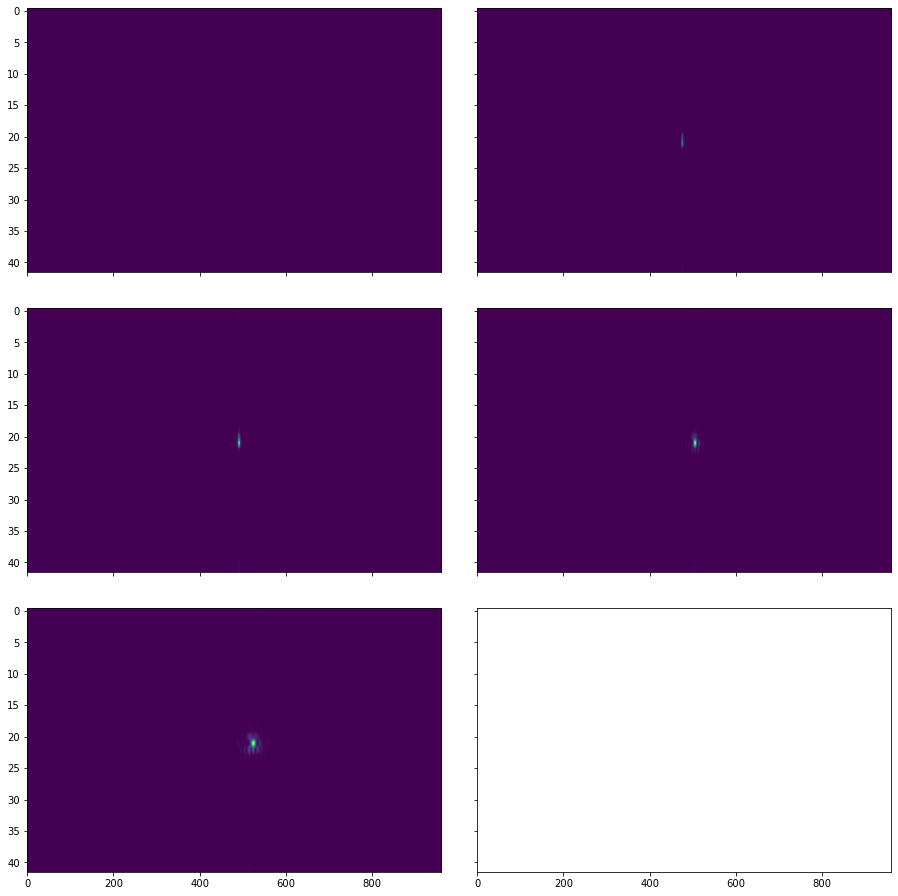

In [2]:
from mpl_toolkits.axes_grid1 import ImageGrid

print(f"Data shape: {w9_image.shape}")
num_frames = w9_image.shape[0]
ncols = 2
nrows = int(np.ceil(num_frames / ncols))

fig = plt.figure()
grid = ImageGrid(fig, (1, 2, ncols, nrows),
                 nrows_ncols=(nrows, ncols),
                 axes_pad=0.5,
                 aspect=False)

for ax, im in zip(grid, w9_image[:, ...]):
    ax.imshow(im, aspect="auto")

## Run "Beam Statistics" Sirepo/Shadow app simulations

In this example, we scan the toroidal mirror's radius and collect the results of the "Beam Statistics" report on the "Beamline" page of Sirepo/Shadow app. At the end of the execution, we provide the timing report for these simulations.

In [3]:
%run -i ../../../examples/prepare_det_env.py

from sirepo_bluesky.sirepo_bluesky import SirepoBluesky
from sirepo_bluesky.sirepo_ophyd import BeamStatisticsReport, create_classes

connection = SirepoBluesky("http://localhost:8000")

data, schema = connection.auth("shadow", "00000002")

classes, objects = create_classes(connection.data,
                                  connection=connection)
globals().update(**objects)

bsr = BeamStatisticsReport(name="bsr", connection=connection)

toroid.r_maj.kind = "hinted"

scan_range = (10_000, 50_000, 21)

(uid,) = RE(bp.scan([bsr], toroid.r_maj, *scan_range))

hdr = db[uid]
tbl = hdr.table()
print(tbl)

data = np.array(tbl["time"].diff(), dtype=float)[1:] / 1e9



Transient Scan ID: 1     Time: 2021-12-16 18:48:10
Persistent Unique Scan ID: '79896867-2d66-4cc3-a986-06f0f3847928'


New stream: 'primary'
+-----------+------------+--------------+
|   seq_num |       time | toroid_r_maj |
+-----------+------------+--------------+
|         1 | 18:48:15.2 |    10000.000 |


|         2 | 18:48:19.3 |    12000.000 |


|         3 | 18:48:23.4 |    14000.000 |


|         4 | 18:48:27.6 |    16000.000 |


|         5 | 18:48:31.7 |    18000.000 |


|         6 | 18:48:35.8 |    20000.000 |


|         7 | 18:48:39.9 |    22000.000 |


|         8 | 18:48:44.1 |    24000.000 |


|         9 | 18:48:48.2 |    26000.000 |


|        10 | 18:48:52.3 |    28000.000 |


|        11 | 18:48:56.5 |    30000.000 |


|        12 | 18:49:00.6 |    32000.000 |


|        13 | 18:49:04.7 |    34000.000 |


|        14 | 18:49:08.9 |    36000.000 |


|        15 | 18:49:13.0 |    38000.000 |


|        16 | 18:49:17.2 |    40000.000 |


|        17 | 18:49:21.3 |    42000.000 |


|        18 | 18:49:25.4 |    44000.000 |


|        19 | 18:49:29.5 |    46000.000 |


|        20 | 18:49:33.7 |    48000.000 |


|        21 | 18:49:37.8 |    50000.000 |
+-----------+------------+--------------+
generator scan ['79896867'] (scan num: 1)





                                 time  toroid_r_maj  \
seq_num                                               
1       2021-12-16 18:48:15.209335566       10000.0   
2       2021-12-16 18:48:19.338214397       12000.0   
3       2021-12-16 18:48:23.465668201       14000.0   
4       2021-12-16 18:48:27.601506472       16000.0   
5       2021-12-16 18:48:31.732415676       18000.0   
6       2021-12-16 18:48:35.860749006       20000.0   
7       2021-12-16 18:48:39.987579823       22000.0   
8       2021-12-16 18:48:44.117058516       24000.0   
9       2021-12-16 18:48:48.251286744       26000.0   
10      2021-12-16 18:48:52.379947662       28000.0   
11      2021-12-16 18:48:56.510715484       30000.0   
12      2021-12-16 18:49:00.640024424       32000.0   
13      2021-12-16 18:49:04.782377005       34000.0   
14      2021-12-16 18:49:08.934136391       36000.0   
15      2021-12-16 18:49:13.075174809       38000.0   
16      2021-12-16 18:49:17.203063011       40000.0   
17      20

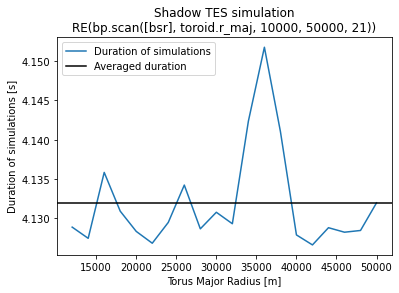

In [4]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(np.linspace(*scan_range)[1:], data, label="Duration of simulations")
ax.set_ylabel("Duration of simulations [s]")
ax.set_xlabel("Torus Major Radius [m]")
ax.axhline(data.mean(), color="k", label="Averaged duration")
ax.legend()
title = (
    f"Shadow TES simulation\n"
    f"RE(bp.scan([bsr], toroid.r_maj, "
    f"{', '.join([str(x) for x in scan_range])}))"
)
ax.set_title(title)
plt.show()